In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

def unpickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data

In [2]:
file_img = '/home/dsola/repos/PGA-Net/data/patch20/20140308_3_20_HH_HV_patches_erie.npy'
file_label = '/home/dsola/repos/PGA-Net/data/patch20/20140308_patch20_stride3_erie.pkl'
file_lat = '/home/dsola/repos/PGA-Net/data/patch20/20140308_3_20_lats_used_erie.npy'
file_lon = '/home/dsola/repos/PGA-Net/data/patch20/20140308_3_20_lons_used_erie.npy'

In [3]:
imgs = np.load(file_img)
ice_cons = unpickle(file_label)[0]

In [4]:
lons = np.load(file_lon)
lats = np.load(file_lat)

In [6]:
np.unique(np.array(ice_cons))

array([0.7, 0.9, 1. ])

In [12]:
a, b = 0, 1

In [13]:
is_zero = (np.array(ice_cons) <= a)
is_one = (np.array(ice_cons) >= b)
is_other = ((np.array(ice_cons) < b) & (np.array(ice_cons) > a) )

In [14]:
print(is_zero.sum())
print(is_one.sum())
print(is_other.sum())
print(np.sum([is_zero.sum(), is_one.sum(), is_other.sum()]))

9641
2939
39583
52163


In [15]:
len(ice_cons)

52163

In [21]:
ice_con_array = np.array(ice_cons)

ice_con_array[is_zero] = [1, 0, 0]

ValueError: NumPy boolean array indexing assignment cannot assign 3 input values to the 9641 output values where the mask is true

In [31]:
ice_con_array = np.where(is_zero, 0, ice_con_array)
ice_con_array = np.where(is_other, 1, ice_con_array)
ice_con_array = np.where(is_one, 2, ice_con_array)
ice_con_array = ice_con_array.astype(int)

In [33]:
n_values = np.max(ice_con_array) + 1
ice_con_one_hot = np.eye(n_values)[ice_con_array]

In [39]:
ice_con_one_hot.astype(int).tolist()

[[1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0, 0, 1],
 [0,

In [7]:
imgs[0].shape

(20, 20, 2)

In [20]:
is_binary = ((np.array(labels)==0)|(np.array(labels)==1))

In [24]:
imgs[is_binary].shape

(12580, 20, 20, 2)

In [32]:
np.array(labels).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
np.array(labels)[is_binary].astype(int)

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
np.concatenate([imgs, imgs], axis=0).shape[0]

104326

In [33]:
isinstance(1.0, int)

False

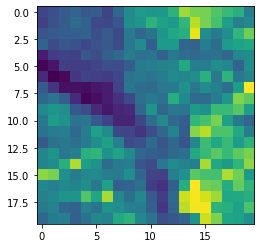

In [12]:
plt.imshow(imgs[0,:,:,0])

(array([ 9641.,     0.,     0.,     0.,     0.,     0.,   615.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,   275.,
            0.,     0.,  3744.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 13854.,     0., 24034.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

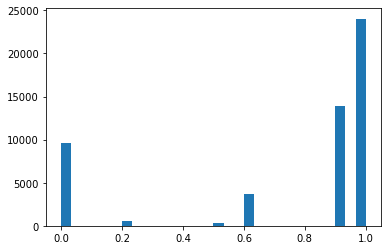

In [35]:
plt.hist(np.array(labels[0]), bins=30)

In [18]:
np.unique(np.array(labels[0]))

array([0.       , 0.2      , 0.5      , 0.6      , 0.9      , 0.9999999,
       1.       ])

In [26]:
(np.array(labels[0])==1).sum()

2939

In [108]:
len(labels[0] + labels[0])

104326

In [34]:
for i in range(10):
    print(labels[2][i], labels[3][i])

11280 16900
11280 16920
11300 16900
11300 16920
11320 16920
11340 16920
11360 16920
11380 16920
11400 16920
11400 16940


In [37]:
data_dir = '/home/dsola/repos/PGA-Net/data/patch20'
files = os.listdir(data_dir)

In [95]:
[x for x in files if '20140328' in x and 'ontario' in x and '.np' in x]

['20140328_3_20_HH_HV_patches_ontario.npy']

In [44]:
tmp = np.load('/home/dsola/repos/PGA-Net/data/patch20/20140328_3_20_HH_HV_patches_erie_bathy.npy')

In [45]:
tmp.shape

(0, 20, 20, 3)

In [83]:
with open("/home/dsola/repos/PGA-Net/data/patch20/imlist_test_ontario.txt","r") as ins:
     for line in ins:
            print(line.strip('\n'))

samples_stride3/HH_HV/patch20/20140112_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140114_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140204_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140301_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140307_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140308_patch20_stride3_ontario.pkl
samples_stride3/HH_HV/patch20/20140325_patch20_stride3_ontario.pkl


In [90]:
line = line.strip('\n')

In [93]:
line.split('/')[-1].split('_')[0]

'20140325'

In [99]:
line.split('/')[-1]

'20140325_patch20_stride3_ontario.pkl'

In [ ]:
15136 zeros, 32614 ones, out of 47750 binary labels.

In [3]:
1/(15136/47750)

3.1547304439746298

In [4]:
1/(32614/47750)

1.46409517385172

In [6]:
300/100

3.0

In [7]:
15136/32614

0.4640951738517201

In [40]:
15136/(15136+32614)

0.3169842931937173

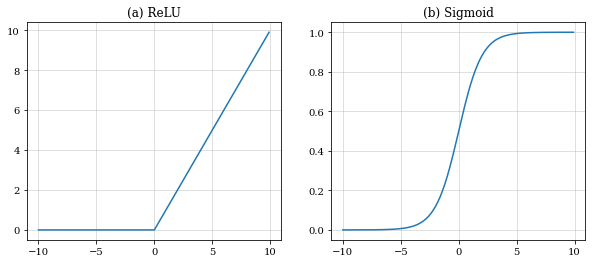

In [48]:
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def ReLU(x):
    if x > 0:
        return x
    else:
        return 0
    
latex = True
#plotting and colour set ups
if latex:
#     mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
#         'text.usetex': True,
        'pgf.rcfonts': False,
    })

x_vals, sig_vals, relu_vals = [], [], []
for i in range(-100, 100, 1):
    x_vals.append(i/10)
    sig_vals.append(sigmoid(i/10))
    relu_vals.append(ReLU(i/10))
    
fig, axs = plt.subplots(1,2, figsize=(10,4))
axs[1].plot(x_vals, sig_vals)
axs[1].set_title('(b) Sigmoid')
axs[0].plot(x_vals, relu_vals)
axs[0].set_title('(a) ReLU')
axs[0].grid(alpha=0.5)
plt.grid(alpha=0.5)

In [49]:
# fig.savefig("../../images/activations.pdf", format='pdf', dpi=1200)